In [1]:
%matplotlib inline

import torch
import numpy as np
import pandas as pd
import seaborn as sns

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([
                       transforms.ToTensor()
                   ])



MNIST_train = datasets.MNIST(r'D:\Data_sets/MNIST', train=True, download=True,
                   transform=transform)

MNIST_test = datasets.MNIST(r'D:\Data_sets/MNIST', train=False, download=True,
                   transform=transform)

In [3]:
train_loader = torch.utils.data.DataLoader(MNIST_train, 
                                           batch_size=64, 
                                           shuffle=True, 
                                           pin_memory=True)

test_loader = torch.utils.data.DataLoader(MNIST_test,
                                          batch_size=1000, 
                                          shuffle=True, 
                                          pin_memory=True)

In [4]:
class NNet(nn.Module):
    def __init__(self):
        super(NNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 100)
        self.fc4 = nn.Linear(100, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x.view(-1, 28*28)))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)

In [21]:
def train(model, lr=0.01, epochs=4):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    model.train(True)
    criterion = nn.CrossEntropyLoss()
    for _ in range(epochs):
        for data, target in train_loader:
                data, target = data.cuda(), target.cuda()
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
    return model

In [22]:
def test(model):
    correct = 0
    model.train(False)
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.cuda(), target.cuda()
            output = model(data)
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    return correct            

In [24]:
results = []

In [25]:
for i in range(100):
    net = NNet().cuda()
    train(net)
    results.append(test(net))
    if i % 10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90


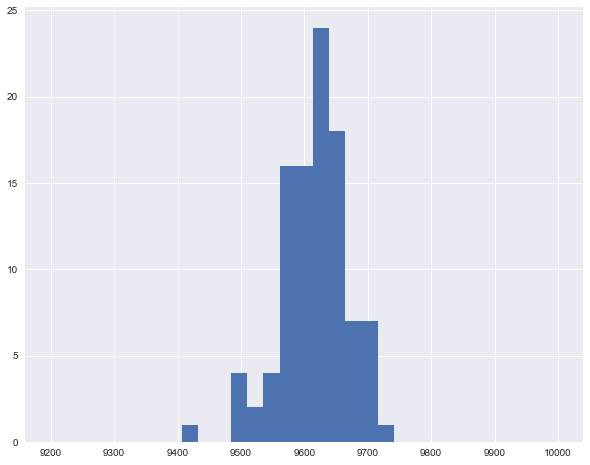

In [49]:
fig = plt.figure(figsize=(10,8))
plt.hist(results, bins=31, range=(9200, 10000));

In [28]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [29]:
mean_confidence_interval(results, confidence=0.95)

(9615.18, 9604.900092558246, 9625.459907441755)